In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data  = pd.read_csv('fifa19data.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Select the U-23 Players from the Database

In [5]:
u23 = data[data.Age <=23]

### Type 1: Select all the Attributes of a player and apply Linear Regression Model on it.

In [6]:
u23 = u23[['Name','Overall', 'Potential','Age','Crossing','Position',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
u23.dropna(inplace = True)

In [7]:
u23.reset_index(drop = True, inplace = True)

In [7]:
x = u23[['Overall','Age','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
y = u23['Potential']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [9]:
r = LinearRegression()

In [10]:
r.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predicted = r.predict(x_test)

#### Perform Evaluation of the Regression Model

In [12]:
rm = mean_squared_error(y_test,predicted)
r2 = r2_score(y_test,predicted)

In [13]:
print('Intercept :', r.intercept_)
print('Root mean square error :', rm)
print('R2 score :', r2)

Intercept : 50.11713129219948
Root mean square error : 5.78682634131874
R2 score : 0.8494163178328994


The R2 score of 84.94% seems pretty good indicating a successful model implementation.

#### Put the Predicted and Actual Potential Values in a DataFrame

In [14]:
predictedu23 = pd.DataFrame(predicted, columns = ['Predicted Potential'])
predictedu23.reset_index(drop = True, inplace = True)

In [15]:
actualu23 = pd.DataFrame(y_test)
actualu23.reset_index(drop = True, inplace = True)

In [16]:
appliedu23 = pd.concat([predictedu23,actualu23], axis = 1,sort = False)

In [17]:
appliedu23.rename(columns ={'Potential':'Actual Potential'}, inplace = True)

In [18]:
appliedu23['Predicted Potential'] = appliedu23['Predicted Potential'].round()

In [19]:
scatterplot = appliedu23.head(25)

In [20]:
scatterplot.reset_index(inplace = True)

In [21]:
scatterplot['Predicted Potential'] = scatterplot['Predicted Potential'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Draw a Scatter Plot to see the Actual Potential vs the Predicted Potential

Text(0, 0.5, 'Potential')

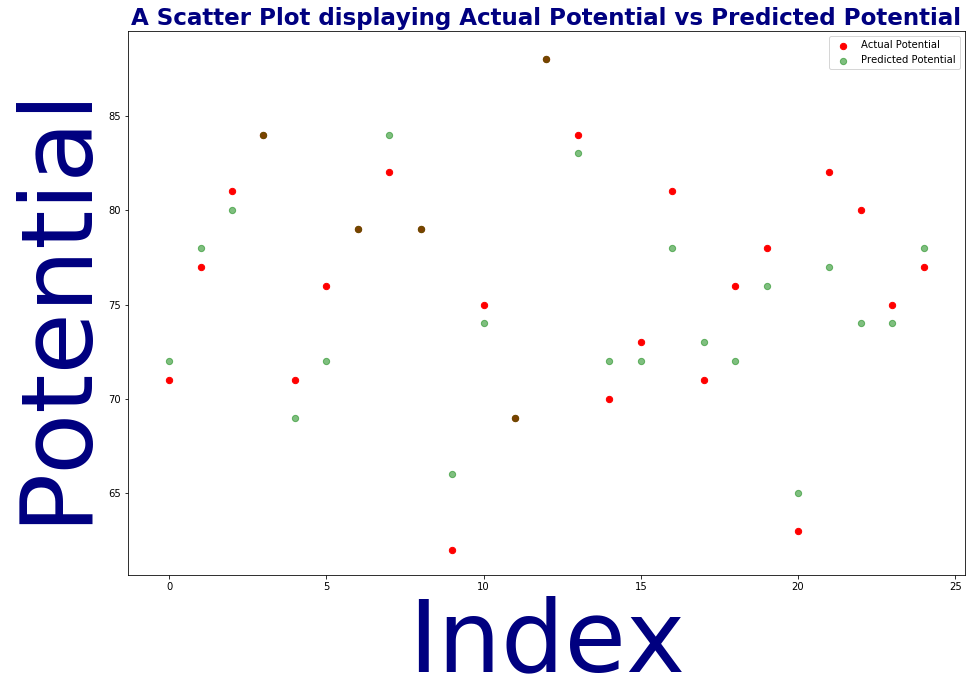

In [22]:
ax = scatterplot.plot.scatter(x = 'index', y = 'Actual Potential',
                              color = 'red', figsize =(15,10), s= 40, label = 'Actual Potential' )
scatterplot.plot.scatter(x = 'index', y ='Predicted Potential',
                         color = 'green',s= 40,label = 'Predicted Potential', alpha = 0.5, ax = ax)
plt.title('A Scatter Plot displaying Actual Potential vs Predicted Potential', 
          fontsize = 23, color = 'navy',fontweight="bold")
plt.xlabel('Index', fontsize = 100, color = 'navy')
plt.ylabel('Potential', fontsize = 100, color = 'navy')

### Type 2: Select Attributes of players in relation to the position they play and apply Linear Regression Model

##### We will divide all the positions into following 8 categories:
##### Goalkeepers, Centre Backs, Full Backs, Defensive Midfielders, Pure Midfielders, Attacking Midfielders, Wingers/Wide Midfielders, Strikers/Centre Forwards.

In [275]:
print('Total Unique Positions for U-23 Players are : ', len(u23.Position.unique()))
print('Number of U-23 Players per position :\n\n',u23.Position.value_counts())

Total Unique Positions for U-23 Players are :  27
Number of U-23 Players per position :

 ST     933
CM     808
CB     805
GK     777
RM     514
LB     504
RB     501
LM     484
CAM    435
CDM    379
LW     220
RW     206
LCB    153
RCB    136
LCM    114
RCM    114
LDM     60
RDM     51
LS      50
RS      46
RWB     39
CF      39
LWB     24
RF       3
LF       2
RAM      1
LAM      1
Name: Position, dtype: int64


###### A) GOALKEEPER

In [123]:
u23gk = u23[u23.Position.isin(['GK'])]

In [124]:
u23gk.reset_index(drop = True, inplace = True)

In [125]:
u23gk = u23gk[['Name', 'Age','Overall', 'Potential','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

Get the Correlation data to find the dependancy of paramaters on each other.

In [126]:
u23gk.corr()

,Age,Overall,Potential,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Age,1.000000,0.435871,-0.071046,0.372472,0.351524,0.303113,0.414780,0.368248
Overall,0.435871,1.000000,0.783863,0.908795,0.877514,0.748268,0.908937,0.922749
Potential,-0.071046,0.783863,1.000000,0.724274,0.705618,0.601537,0.708553,0.744641
GKDiving,0.372472,0.908795,0.724274,1.000000,0.727363,0.655789,0.770441,0.846061
GKHandling,0.351524,0.877514,0.705618,0.727363,1.000000,0.665902,0.785778,0.750891
GKKicking,0.303113,0.748268,0.601537,0.655789,0.665902,1.000000,0.699637,0.648514
GKPositioning,0.414780,0.908937,0.708553,0.770441,0.785778,0.699637,1.000000,0.779720
GKReflexes,0.368248,0.922749,0.744641,0.846061,0.750891,0.648514,0.779720,1.000000


In [127]:
xgk = u23gk[['Age','Overall','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
ygk = u23gk[['Potential']]

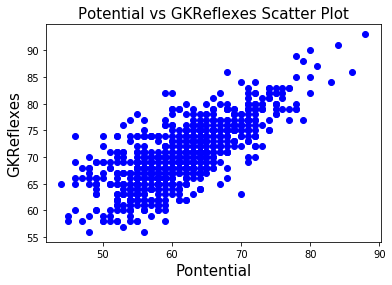

In [248]:
plt.scatter(x = xgk['GKReflexes'], y = ygk, color = 'blue')
plt.title('Potential vs GKReflexes Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('GKReflexes', fontsize = 15)
plt.show()

In [129]:
xgk_train, xgk_test, ygk_train,ygk_test = train_test_split(xgk, ygk, test_size = 0.2, random_state = 0)

In [130]:
lrgk = LinearRegression()

In [131]:
lrgk.fit(xgk_train, ygk_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
gkpredict = lrgk.predict(xgk_test)

Find the Intercept, RM square error and R2 score

In [133]:
print('Intercept :', lrgk.intercept_)
print('Root mean square error :', mean_squared_error(ygk_test, gkpredict))
print('R2 score :', r2_score(ygk_test, gkpredict))

Intercept : [47.1470365]
Root mean square error : 5.87618884550656
R2 score : 0.8563858464181078


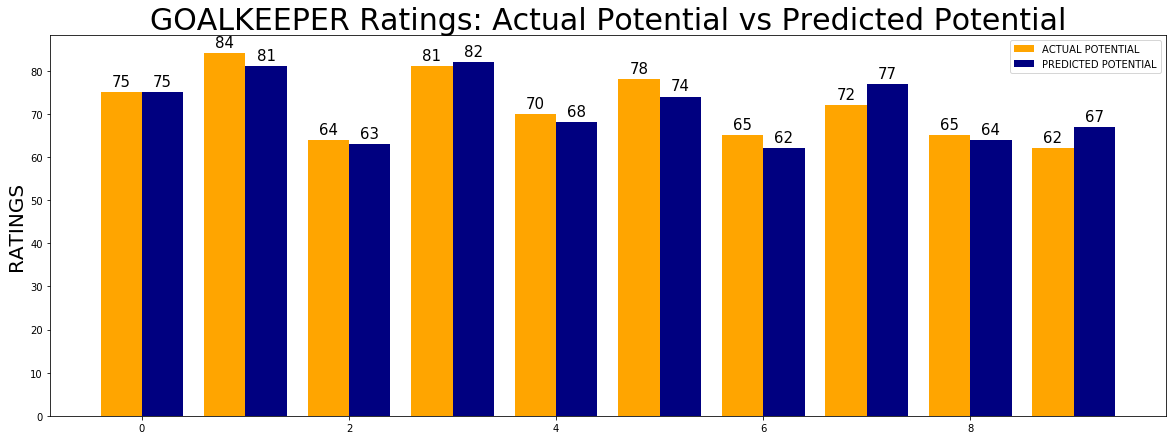

In [250]:
y = ygk_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(gkpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('GOALKEEPER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### B) CENTRE BACK

In [8]:
u23cb = u23[u23.Position.isin(['CB','LCB','RCB'])]

In [9]:
u23cb = u23cb[['Name', 'Age','Overall', 'Potential','BallControl','HeadingAccuracy', 'ShortPassing',
       'Jumping','Strength', 'Aggression',
       'Interceptions', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

In [10]:
u23cb.corr()

,Age,Overall,Potential,BallControl,HeadingAccuracy,ShortPassing,Jumping,Strength,Aggression,Interceptions,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.460519,-0.009191,0.309895,0.401135,0.300786,0.070459,0.384993,0.390548,0.401137,0.366525,0.414012,0.385661,0.380900
Overall,0.460519,1.000000,0.807660,0.736402,0.836331,0.752779,0.232452,0.564395,0.738554,0.897255,0.789864,0.872053,0.907795,0.871668
Potential,-0.009191,0.807660,1.000000,0.604891,0.660304,0.628573,0.203132,0.391129,0.561638,0.731753,0.621079,0.722529,0.749866,0.708968
BallControl,0.309895,0.736402,0.604891,1.000000,0.557315,0.832030,0.141344,0.289304,0.506576,0.645994,0.684665,0.584682,0.578398,0.568800
HeadingAccuracy,0.401135,0.836331,0.660304,0.557315,1.000000,0.612518,0.151932,0.506341,0.595351,0.708488,0.642675,0.683885,0.747641,0.707264
ShortPassing,0.300786,0.752779,0.628573,0.832030,0.612518,1.000000,0.095427,0.307175,0.535701,0.662097,0.661862,0.586302,0.602070,0.564271
Jumping,0.070459,0.232452,0.203132,0.141344,0.151932,0.095427,1.000000,0.017662,0.154926,0.206993,0.203042,0.158568,0.199462,0.215836
Strength,0.384993,0.564395,0.391129,0.289304,0.506341,0.307175,0.017662,1.000000,0.494844,0.394583,0.431394,0.426716,0.411937,0.355532
Aggression,0.390548,0.738554,0.561638,0.506576,0.595351,0.535701,0.154926,0.494844,1.000000,0.613894,0.572790,0.563666,0.592473,0.567368
Interceptions,0.401137,0.897255,0.731753,0.645994,0.708488,0.662097,0.206993,0.394583,0.613894,1.000000,0.721704,0.772836,0.813219,0.781688


In [29]:
xcb = u23cb[['Age','Overall','HeadingAccuracy','Interceptions','Marking', 'StandingTackle', 'SlidingTackle']]
ycb = u23cb[['Potential']]

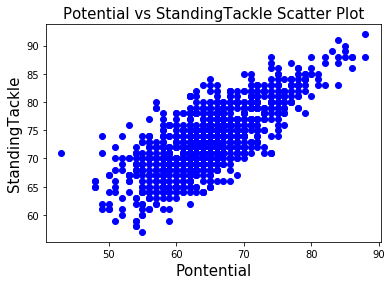

In [30]:
plt.scatter(x = xcb['StandingTackle'], y = ycb, color = 'blue')
plt.title('Potential vs StandingTackle Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('StandingTackle', fontsize = 15)
plt.show()

In [31]:
xcb_train, xcb_test, ycb_train, ycb_test = train_test_split(xcb, ycb, test_size = 0.20, random_state = 0)

In [32]:
cblr = LinearRegression()

In [33]:
cblr.fit(xcb_train, ycb_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
cbpredict = cblr.predict(xcb_test)

In [35]:
print('Intercept :', cblr.intercept_)
print('Root mean square error :', mean_squared_error(ycb_test, cbpredict))
print('R2 score :', r2_score(ycb_test, cbpredict))

Intercept : [49.17765502]
Root mean square error : 5.848133564732575
R2 score : 0.8169089318178537


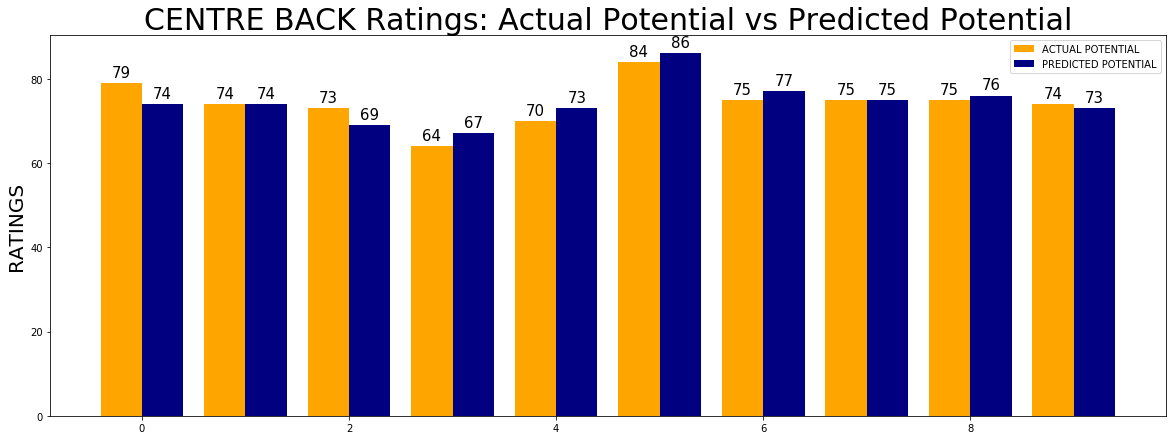

In [36]:
y = ycb_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(cbpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('CENTRE BACK Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### C) FULL BACK

In [148]:
u23fb = u23[u23.Position.isin(['LB','RB','LWB','RWB'])]

In [149]:
u23fb = u23fb[['Name', 'Age','Overall', 'Potential','Crossing','HeadingAccuracy', 'ShortPassing','Dribbling'
               ,'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Jumping', 'Stamina', 'Strength', 
               'Aggression','Interceptions', 'Composure','Marking', 'StandingTackle', 'SlidingTackle']]

In [150]:
u23fb.corr()

,Age,Overall,Potential,Crossing,HeadingAccuracy,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Jumping,Stamina,Strength,Aggression,Interceptions,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.425804,-0.082397,0.351007,0.267220,0.335373,0.226019,0.290480,0.338067,0.164985,0.240749,0.165937,0.378157,0.295080,0.245270,0.337795,0.344059,0.355591,0.343379,0.348775
Overall,0.425804,1.000000,0.795060,0.831006,0.616930,0.809502,0.680344,0.684009,0.842682,0.463287,0.520344,0.301823,0.641864,0.420636,0.599742,0.838549,0.802841,0.811673,0.845171,0.836044
Potential,-0.082397,0.795060,1.000000,0.662445,0.473976,0.640855,0.590026,0.522664,0.686183,0.394429,0.409304,0.193812,0.450712,0.256890,0.459252,0.667143,0.637438,0.644020,0.688636,0.679083
Crossing,0.351007,0.831006,0.662445,1.000000,0.410759,0.739891,0.680872,0.642164,0.781142,0.410521,0.429578,0.140029,0.486686,0.264088,0.418192,0.632344,0.652030,0.618978,0.639822,0.641418
HeadingAccuracy,0.267220,0.616930,0.473976,0.410759,1.000000,0.477205,0.266580,0.411771,0.455296,0.007441,0.143847,0.268883,0.301674,0.493012,0.430714,0.560173,0.508558,0.552324,0.612709,0.599169
ShortPassing,0.335373,0.809502,0.640855,0.739891,0.477205,1.000000,0.561755,0.818125,0.827129,0.330617,0.408797,0.221234,0.483177,0.352854,0.424146,0.581494,0.700673,0.601514,0.584222,0.554359
Dribbling,0.226019,0.680344,0.590026,0.680872,0.266580,0.561755,1.000000,0.517544,0.710245,0.485274,0.455316,0.101410,0.407389,0.133421,0.402751,0.496056,0.585575,0.468665,0.529669,0.521313
LongPassing,0.290480,0.684009,0.522664,0.642164,0.411771,0.818125,0.517544,1.000000,0.694050,0.297503,0.386357,0.200347,0.447037,0.328129,0.410866,0.483988,0.646940,0.527443,0.472844,0.436877
BallControl,0.338067,0.842682,0.686183,0.781142,0.455296,0.827129,0.710245,0.694050,1.000000,0.412771,0.464181,0.214673,0.489568,0.322824,0.459054,0.613854,0.743151,0.614893,0.624899,0.603290
Acceleration,0.164985,0.463287,0.394429,0.410521,0.007441,0.330617,0.485274,0.297503,0.412771,1.000000,0.835121,0.204221,0.441081,0.066351,0.242843,0.254707,0.371986,0.242776,0.207199,0.225660


In [151]:
xfb = u23fb[['Age','Overall','Crossing', 'BallControl','Interceptions', 'StandingTackle', 'SlidingTackle']]
yfb = u23fb[['Potential']]

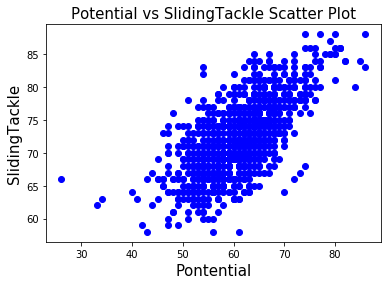

In [246]:
plt.scatter(x = xfb['SlidingTackle'], y = yfb, color = 'blue')
plt.title('Potential vs SlidingTackle Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('SlidingTackle', fontsize = 15)
plt.show()

In [153]:
xfb_train, xfb_test, yfb_train, yfb_test = train_test_split(xfb, yfb, test_size = 0.20, random_state = 0)

In [154]:
fblr = LinearRegression()

In [155]:
fblr.fit(xfb_train, yfb_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
fbpredict = fblr.predict(xfb_test)

In [157]:
print('Intercept :', fblr.intercept_)
print('Root mean square error :', mean_squared_error(yfb_test, fbpredict))
print('R2 score :', r2_score(yfb_test, fbpredict))

Intercept : [50.54284728]
Root mean square error : 5.366467675209051
R2 score : 0.8348795817924303


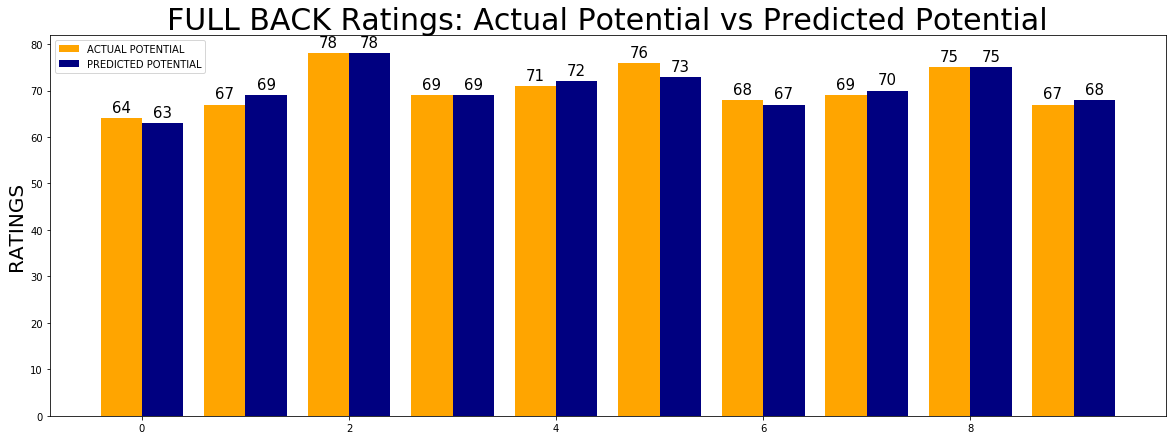

In [252]:
y = yfb_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(fbpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('FULL BACK Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### D) DEFENSIVE MIDFIELDER

In [159]:
u23cdm = u23[u23.Position.isin(['CDM','LDM','RDM'])]

In [160]:
u23cdm = u23cdm[['Name', 'Age','Overall', 'Potential', 'ShortPassing','LongPassing', 'BallControl','Stamina',
                 'Strength', 'Aggression','Interceptions', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

In [161]:
u23cdm.corr()

,Age,Overall,Potential,ShortPassing,LongPassing,BallControl,Stamina,Strength,Aggression,Interceptions,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.434596,-0.113265,0.321486,0.353811,0.339951,0.393141,0.274547,0.283503,0.349232,0.334278,0.313464,0.335501,0.236561
Overall,0.434596,1.000000,0.774439,0.844394,0.832649,0.867778,0.616438,0.451775,0.553709,0.822279,0.798865,0.700474,0.808592,0.628346
Potential,-0.113265,0.774439,1.000000,0.694469,0.635480,0.696440,0.390495,0.289381,0.410720,0.643556,0.649805,0.557761,0.646505,0.498391
ShortPassing,0.321486,0.844394,0.694469,1.000000,0.862316,0.822906,0.360887,0.267190,0.378679,0.592134,0.699893,0.533640,0.629047,0.499957
LongPassing,0.353811,0.832649,0.635480,0.862316,1.000000,0.803462,0.377772,0.295963,0.369219,0.585958,0.688844,0.479699,0.604638,0.491883
BallControl,0.339951,0.867778,0.696440,0.822906,0.803462,1.000000,0.446710,0.297714,0.355747,0.628023,0.731355,0.512235,0.637810,0.474717
Stamina,0.393141,0.616438,0.390495,0.360887,0.377772,0.446710,1.000000,0.374020,0.409494,0.548229,0.485238,0.450593,0.444138,0.288732
Strength,0.274547,0.451775,0.289381,0.267190,0.295963,0.297714,0.374020,1.000000,0.389793,0.414799,0.306980,0.401052,0.434606,0.269763
Aggression,0.283503,0.553709,0.410720,0.378679,0.369219,0.355747,0.409494,0.389793,1.000000,0.506729,0.417758,0.466579,0.531530,0.469183
Interceptions,0.349232,0.822279,0.643556,0.592134,0.585958,0.628023,0.548229,0.414799,0.506729,1.000000,0.627380,0.724617,0.788477,0.657677


In [162]:
xcdm = u23cdm[['Age','Overall','ShortPassing','LongPassing', 'BallControl', 'Composure', 'StandingTackle']]
ycdm = u23cdm[['Potential']]

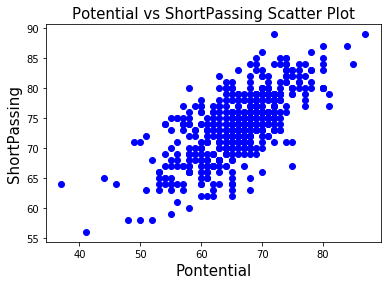

In [244]:
plt.scatter(x = xcdm['ShortPassing'], y = ycdm, color = 'blue')
plt.title('Potential vs ShortPassing Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('ShortPassing', fontsize = 15)
plt.show()

In [164]:
xcdm_train, xcdm_test, ycdm_train, ycdm_test = train_test_split(xcdm, ycdm, test_size = 0.20, random_state = 0)

In [165]:
cdmlr = LinearRegression()

In [166]:
cdmlr.fit(xcdm_train, ycdm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
cdmpredict = cdmlr.predict(xcdm_test)

In [168]:
print('Intercept :', cdmlr.intercept_)
print('Root mean square error :', mean_squared_error(ycdm_test, cdmpredict))
print('R2 score :', r2_score(ycdm_test, cdmpredict))

Intercept : [51.86710991]
Root mean square error : 4.994911637192226
R2 score : 0.8284962894880246


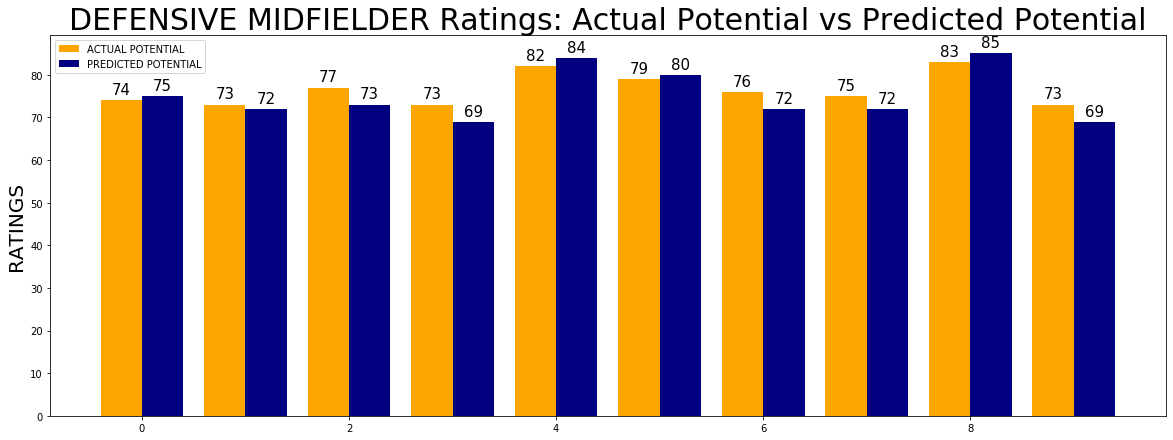

In [253]:
y = ycdm_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(cdmpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))
bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('DEFENSIVE MIDFIELDER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### E) CENTRAL MIDFIELDER

In [170]:
u23cm = u23[u23.Position.isin(['CM','LCM','RCM'])]

In [171]:
u23cm = u23cm[['Name','Overall', 'Potential','Age','ShortPassing','Dribbling',
               'LongPassing', 'BallControl', 'Reactions',
               'LongShots','Positioning', 'Vision']]

In [172]:
u23cm.corr()

,Overall,Potential,Age,ShortPassing,Dribbling,LongPassing,BallControl,Reactions,LongShots,Positioning,Vision
Overall,1.000000,0.834110,0.520162,0.902613,0.892059,0.877915,0.932450,0.862242,0.789789,0.735269,0.882389
Potential,0.834110,1.000000,0.077495,0.780226,0.777160,0.743753,0.794351,0.718041,0.636238,0.606759,0.744623
Age,0.520162,0.077495,1.000000,0.439946,0.415846,0.448946,0.444802,0.431570,0.435619,0.386293,0.445438
ShortPassing,0.902613,0.780226,0.439946,1.000000,0.806246,0.911900,0.854745,0.749763,0.648502,0.613697,0.790396
Dribbling,0.892059,0.777160,0.415846,0.806246,1.000000,0.784324,0.913213,0.732539,0.716284,0.678266,0.807405
LongPassing,0.877915,0.743753,0.448946,0.911900,0.784324,1.000000,0.821499,0.695021,0.669036,0.587168,0.781241
BallControl,0.932450,0.794351,0.444802,0.854745,0.913213,0.821499,1.000000,0.774996,0.747401,0.669150,0.833600
Reactions,0.862242,0.718041,0.431570,0.749763,0.732539,0.695021,0.774996,1.000000,0.650577,0.651978,0.735407
LongShots,0.789789,0.636238,0.435619,0.648502,0.716284,0.669036,0.747401,0.650577,1.000000,0.635837,0.693486
Positioning,0.735269,0.606759,0.386293,0.613697,0.678266,0.587168,0.669150,0.651978,0.635837,1.000000,0.660153


In [173]:
xcm = u23cm[['Age','Overall','ShortPassing', 'Dribbling', 'LongPassing', 'BallControl', 'Vision']]
ycm = u23cm[['Potential']]

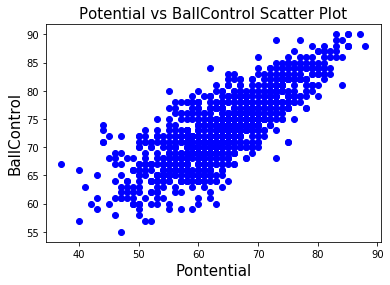

In [243]:
plt.scatter(x = xcm['BallControl'], y = ycm, color = 'blue')
plt.title('Potential vs BallControl Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('BallControl', fontsize = 15)
plt.show()

In [175]:
xcm_train, xcm_test, ycm_train, ycm_test = train_test_split(xcm, ycm, test_size = 0.20, random_state = 0)

In [176]:
cmlr = LinearRegression()

In [177]:
cmlr.fit(xcm_train, ycm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
cmpredict = cmlr.predict(xcm_test)

In [179]:
print('Intercept :', cmlr.intercept_)
print('Root mean square error :', mean_squared_error(ycm_test, cmpredict))
print('R2 score :', r2_score(ycm_test, cmpredict))

Intercept : [49.13594029]
Root mean square error : 5.391572660427436
R2 score : 0.8760934603906961


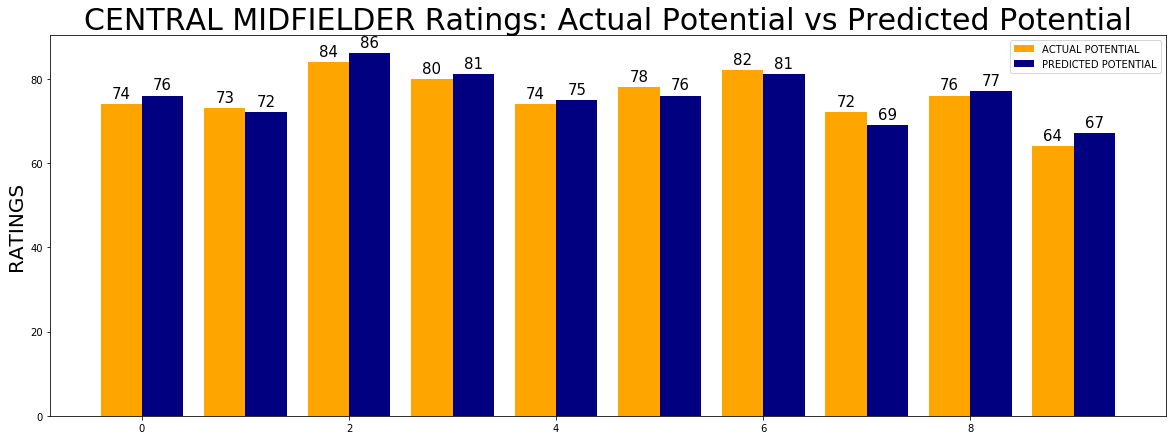

In [255]:
y = ycm_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(cmpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('CENTRAL MIDFIELDER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)


def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### F) ATTACKING MIDFIELFER

In [198]:
u23cam = u23[u23.Position.isin(['CAM','LAM','RAM'])]

In [199]:
u23cam = u23cam[['Name','Overall', 'Potential','Age','Crossing','Finishing','ShortPassing',
                 'Dribbling','LongPassing', 'BallControl','Reactions','LongShots','Vision']]

In [200]:
u23cam.corr()

,Overall,Potential,Age,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Reactions,LongShots,Vision
Overall,1.000000,0.746055,0.462193,0.752632,0.782213,0.818340,0.870019,0.671063,0.910897,0.778930,0.790052,0.837829
Potential,0.746055,1.000000,-0.126041,0.566896,0.532753,0.640520,0.688291,0.527594,0.731118,0.487841,0.572287,0.664867
Age,0.462193,-0.126041,1.000000,0.332816,0.429549,0.346874,0.354179,0.244976,0.351091,0.447465,0.381051,0.326611
Crossing,0.752632,0.566896,0.332816,1.000000,0.567532,0.633641,0.668476,0.546490,0.704039,0.546498,0.589889,0.662440
Finishing,0.782213,0.532753,0.429549,0.567532,1.000000,0.494068,0.684420,0.352095,0.688689,0.599108,0.746812,0.537079
ShortPassing,0.818340,0.640520,0.346874,0.633641,0.494068,1.000000,0.602381,0.843070,0.718726,0.575224,0.568008,0.766414
Dribbling,0.870019,0.688291,0.354179,0.668476,0.684420,0.602381,1.000000,0.463547,0.885597,0.623664,0.660715,0.648756
LongPassing,0.671063,0.527594,0.244976,0.546490,0.352095,0.843070,0.463547,1.000000,0.593330,0.507925,0.480140,0.684371
BallControl,0.910897,0.731118,0.351091,0.704039,0.688689,0.718726,0.885597,0.593330,1.000000,0.670553,0.679965,0.734926
Reactions,0.778930,0.487841,0.447465,0.546498,0.599108,0.575224,0.623664,0.507925,0.670553,1.000000,0.594992,0.621991


In [201]:
xcam = u23cam[['Overall','Age','Finishing','ShortPassing',
                 'Dribbling','BallControl','LongShots']]
ycam = u23cam[['Potential']]

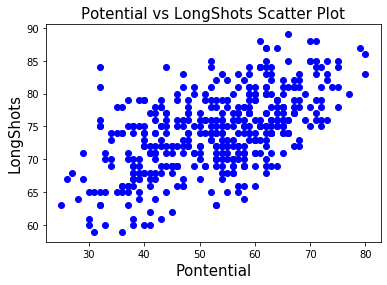

In [242]:
plt.scatter(x = xcam['LongShots'], y = ycam, color = 'blue')
plt.title('Potential vs LongShots Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('LongShots', fontsize = 15)
plt.show()

In [203]:
xcam_train, xcam_test, ycam_train, ycam_test = train_test_split(xcam, ycam, test_size = 0.20, random_state = 0)

In [204]:
camlr = LinearRegression()

In [205]:
camlr.fit(xcam_train, ycam_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
campredict = camlr.predict(xcam_test)

In [207]:
print('Intercept : ',camlr.intercept_)
print('Mean Sqaured Error : ',mean_squared_error(ycam_test, campredict))
print('R2 Score : ', r2_score(ycam_test, campredict))

Intercept :  [52.61743712]
Mean Sqaured Error :  6.134280487990313
R2 Score :  0.8279643205361391


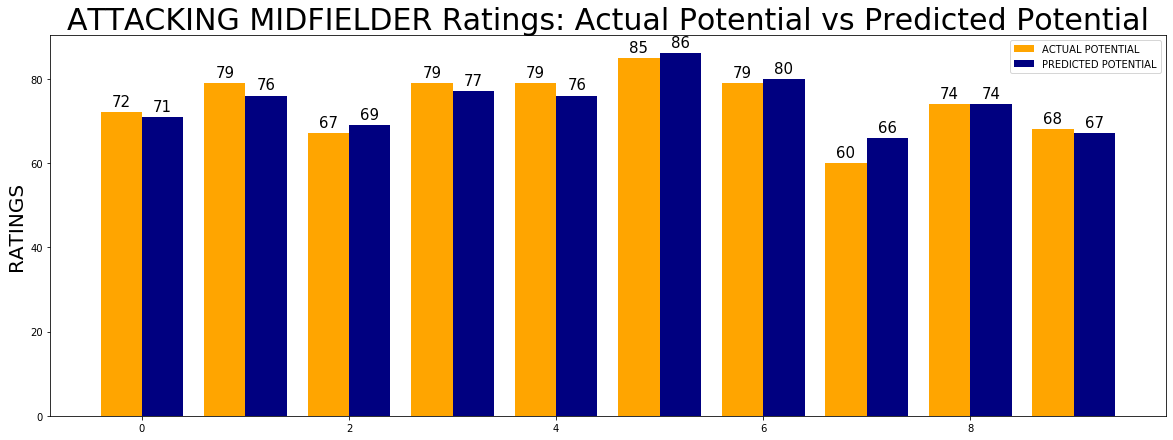

In [256]:
y = ycam_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(campredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('ATTACKING MIDFIELDER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### G) WINGER / WIDE MIDFIELDER

In [210]:
u23wg = u23[u23.Position.isin(['LW','RW','LM','RM'])]

In [211]:
u23wg = u23wg[['Name','Overall', 'Potential','Age','Crossing','Finishing','ShortPassing', 'Volleys',
               'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
               'Reactions','LongShots', 'Aggression','Positioning', 'Vision']]

In [212]:
u23wg.corr()

,Overall,Potential,Age,Crossing,Finishing,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,LongShots,Aggression,Positioning,Vision
Overall,1.000000,0.800808,0.397217,0.759119,0.704523,0.850063,0.622069,0.896692,0.666825,0.520671,0.639674,0.910297,0.826816,0.732913,0.371882,0.826020,0.810435
Potential,0.800808,1.000000,-0.112332,0.584689,0.587425,0.667712,0.517611,0.770733,0.553541,0.414186,0.466253,0.766208,0.632691,0.568004,0.232822,0.666428,0.658621
Age,0.397217,-0.112332,1.000000,0.314935,0.257722,0.342399,0.199855,0.287070,0.225412,0.214217,0.314749,0.304108,0.373727,0.330689,0.263565,0.322594,0.305159
Crossing,0.759119,0.584689,0.314935,1.000000,0.443611,0.697779,0.453179,0.666863,0.593934,0.504375,0.624550,0.683613,0.562675,0.497817,0.232673,0.574301,0.611431
Finishing,0.704523,0.587425,0.257722,0.443611,1.000000,0.487504,0.655801,0.664441,0.475572,0.347883,0.294559,0.653791,0.520510,0.706565,0.098656,0.692847,0.531254
ShortPassing,0.850063,0.667712,0.342399,0.697779,0.487504,1.000000,0.476997,0.710257,0.594994,0.485051,0.796700,0.774346,0.712116,0.599040,0.385468,0.652365,0.754878
Volleys,0.622069,0.517611,0.199855,0.453179,0.655801,0.476997,1.000000,0.618535,0.627218,0.490450,0.327872,0.613450,0.480758,0.664926,0.108166,0.542335,0.516787
Dribbling,0.896692,0.770733,0.287070,0.666863,0.664441,0.710257,0.618535,1.000000,0.633930,0.483580,0.505588,0.902047,0.694092,0.657427,0.220768,0.699194,0.713753
Curve,0.666825,0.553541,0.225412,0.593934,0.475572,0.594994,0.627218,0.633930,1.000000,0.719820,0.508154,0.657786,0.524963,0.626114,0.253149,0.499907,0.614394
FKAccuracy,0.520671,0.414186,0.214217,0.504375,0.347883,0.485051,0.490450,0.483580,0.719820,1.000000,0.474909,0.502257,0.407384,0.520485,0.213153,0.373760,0.536544


In [213]:
xwg = u23wg[['Overall','Age','Finishing','Crossing','ShortPassing',
               'Dribbling','BallControl']]
ywg = u23wg[['Potential']]

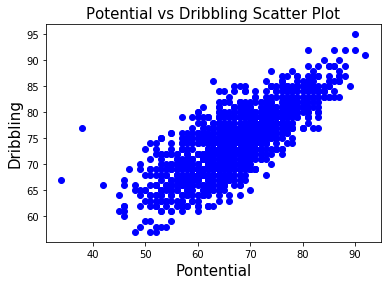

In [241]:
plt.scatter(x = xwg['Dribbling'], y = ywg, color = 'blue')
plt.title('Potential vs Dribbling Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('Dribbling', fontsize = 15)
plt.show()

In [215]:
xwg_train, xwg_test, ywg_train, ywg_test = train_test_split(xwg, ywg, test_size = 0.20, random_state = 0)

In [216]:
wglr = LinearRegression()

In [217]:
wglr.fit(xwg_train, ywg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
wgpredict = wglr.predict(xwg_test)

In [219]:
print('Intercept : ',wglr.intercept_)
print('Mean Sqaured Error : ',mean_squared_error(ywg_test, wgpredict))
print('R2 Score : ', r2_score(ywg_test, wgpredict))

Intercept :  [53.26872812]
Mean Sqaured Error :  4.897028784707573
R2 Score :  0.8839914898259899


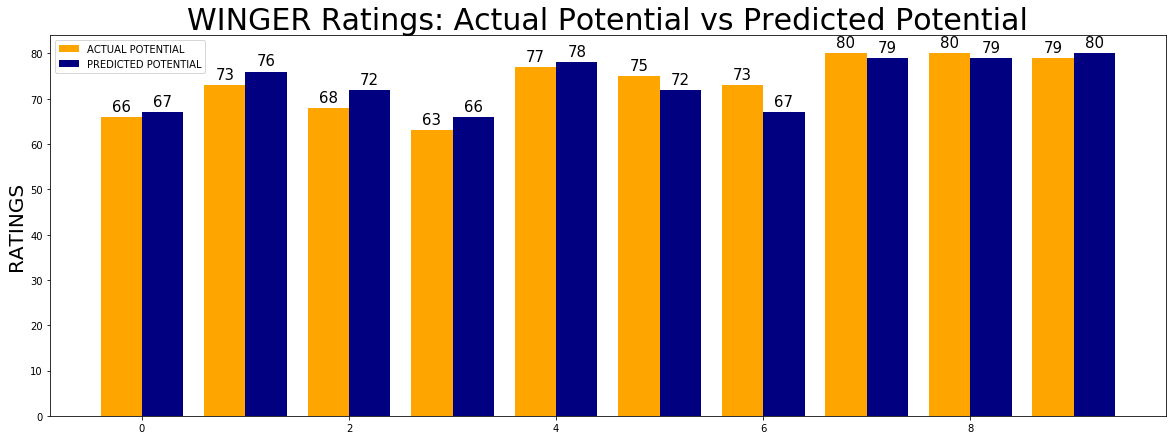

In [257]:
y = ywg_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(wgpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,7))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('WINGER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

###### H) STRIKER / CENTRE FORWARD

In [222]:
u23st = u23[u23.Position.isin(['ST','CF','LS','RS','LF','RF'])]

In [223]:
u23st = u23st[['Name','Overall', 'Potential','Age','Finishing', 'ShortPassing', 'Volleys', 'Dribbling',
               'BallControl','Reactions', 'ShotPower','LongShots', 'Positioning']]

In [224]:
u23st.corr()

,Overall,Potential,Age,Finishing,ShortPassing,Volleys,Dribbling,BallControl,Reactions,ShotPower,LongShots,Positioning
Overall,1.000000,0.750288,0.491430,0.871001,0.797794,0.778632,0.823531,0.890683,0.816853,0.859662,0.757596,0.884555
Potential,0.750288,1.000000,-0.085565,0.688002,0.604844,0.571764,0.644675,0.699197,0.609075,0.604923,0.566466,0.662822
Age,0.491430,-0.085565,1.000000,0.387157,0.380210,0.389137,0.368818,0.393958,0.395640,0.465452,0.374051,0.434581
Finishing,0.871001,0.688002,0.387157,1.000000,0.631151,0.678935,0.652549,0.740419,0.713724,0.727355,0.705900,0.783205
ShortPassing,0.797794,0.604844,0.380210,0.631151,1.000000,0.657483,0.748777,0.787724,0.667476,0.641402,0.621843,0.693566
Volleys,0.778632,0.571764,0.389137,0.678935,0.657483,1.000000,0.685594,0.707101,0.637604,0.711690,0.662440,0.664115
Dribbling,0.823531,0.644675,0.368818,0.652549,0.748777,0.685594,1.000000,0.867799,0.660012,0.683874,0.640027,0.643957
BallControl,0.890683,0.699197,0.393958,0.740419,0.787724,0.707101,0.867799,1.000000,0.702267,0.741044,0.658429,0.753097
Reactions,0.816853,0.609075,0.395640,0.713724,0.667476,0.637604,0.660012,0.702267,1.000000,0.649641,0.662850,0.760821
ShotPower,0.859662,0.604923,0.465452,0.727355,0.641402,0.711690,0.683874,0.741044,0.649641,1.000000,0.699132,0.706216


In [225]:
xst = u23st[['Overall','Age','Finishing', 'Dribbling',
               'BallControl', 'ShotPower','Positioning']]
yst = u23st[['Potential']]

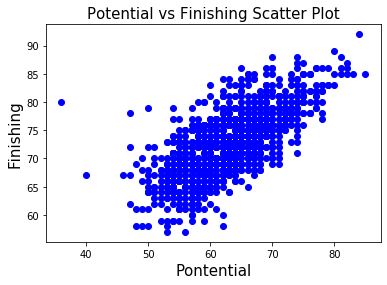

In [240]:
plt.scatter(x = xst['Finishing'], y = yst, color = 'blue')
plt.title('Potential vs Finishing Scatter Plot', fontsize = 15)
plt.xlabel('Pontential', fontsize = 15)
plt.ylabel('Finishing', fontsize = 15)
plt.show()

In [227]:
xst_train, xst_test, yst_train, yst_test = train_test_split(xst, yst, test_size = 0.20, random_state = 0)

In [228]:
stlr = LinearRegression()

In [229]:
stlr.fit(xst_train, yst_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
stpredict = stlr.predict(xst_test)

In [231]:
print('Intercept : ',stlr.intercept_)
print('Mean Sqaured Error : ',mean_squared_error(yst_test, stpredict))
print('R2 Score : ', r2_score(yst_test, stpredict))

Intercept :  [50.97667677]
Mean Sqaured Error :  4.602817840530803
R2 Score :  0.863141257248628


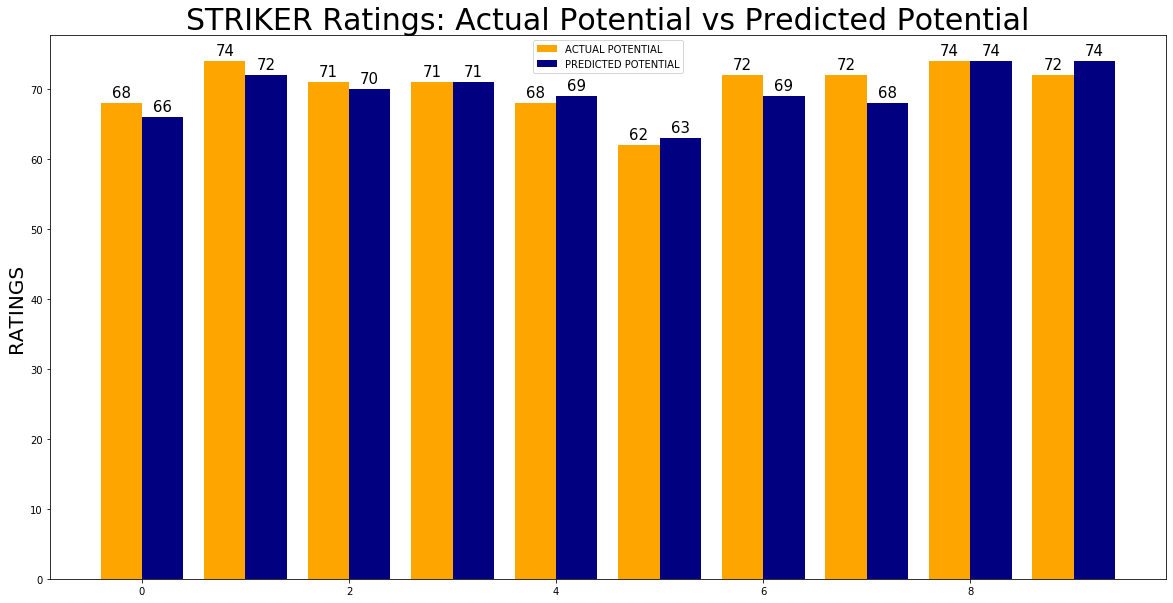

In [263]:
y = yst_test.head(10)
x = np.arange(len(y))
y1 = pd.DataFrame(stpredict, columns = ['Predicted_Potential']).head(10)
y1.Predicted_Potential = y1.Predicted_Potential.round().astype(int)
x1 = np.arange(len(y))
width = 0.40
fig,ax = plt.subplots(figsize = (20,10))

bar1 = ax.bar(x - width/2,y.Potential,width, color = 'Orange', label = 'ACTUAL POTENTIAL')
bar2 = ax.bar(x1 + width/2, y1.Predicted_Potential,width, color = 'Navy', label = 'PREDICTED POTENTIAL')
ax.legend()
ax.set_title('STRIKER Ratings: Actual Potential vs Predicted Potential', fontsize = 30)
ax.set_ylabel('RATINGS',fontsize = 20)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)
autolabel(bar1)
autolabel(bar2)

### --------------------------------------------- END OF CURRENT FIFA 19 PROJECT --------------------------------------------------------

# FUTURE SCOPE OF THE PROJECT : WORK IN PROGRESS

### Find the Best Position for a Player based on it's Attributes

In [71]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [128]:
bestposition = data[['Name','Age','Position','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 
                     'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                     'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                     'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 
                     'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 
                     'GKPositioning', 'GKReflexes']]

In [131]:
bestposition.dropna(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
posX = bestposition[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                     'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                     'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 
                     'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 
                     'SlidingTackle', 'GKDiving', 'GKHandling',
                     'GKKicking', 'GKPositioning', 'GKReflexes']].values 
posY = bestposition[['Position']].values

In [136]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

posX = preprocessing.StandardScaler().fit(posX).transform(posX.astype(float))

x_train, x_test, y_train, y_test = train_test_split(posX, posY, test_size = 0.2, random_state = 0)

k = 1 
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [137]:
predictposition = knn.predict(x_test)

In [139]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictposition))

Test set Accuracy:  0.41460055096418735


In [141]:
print(y_test[0:20])
print(predictposition[0:20])

[['CM']
 ['LW']
 ['RCB']
 ['LB']
 ['RM']
 ['ST']
 ['GK']
 ['LB']
 ['RB']
 ['RW']
 ['LCB']
 ['CAM']
 ['LB']
 ['CAM']
 ['GK']
 ['GK']
 ['CB']
 ['GK']
 ['GK']
 ['LDM']]
['CM' 'LM' 'CB' 'LCB' 'RM' 'ST' 'GK' 'LB' 'RB' 'CAM' 'LCB' 'RW' 'CDM'
 'CAM' 'GK' 'GK' 'CB' 'GK' 'GK' 'CM']
